In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

## profiling

In [2]:
READHR = 'l2_tex_read_hit_rate'
READTR = 'l2_tex_read_transactions'
WRITEHR = 'l2_tex_write_hit_rate'
WRITETR = 'l2_tex_write_transactions'

In [3]:
#model = 'resnet50'
#model = 'resnet152'
model = 'vgg16'

In [4]:
onegpu = pd.read_csv('./src/'+model+'/l12_one.csv')
onegpu = onegpu.drop(0)
onegpu = onegpu.dropna(subset=[READHR,READTR,WRITEHR,WRITETR])
onegpu = onegpu.reset_index(drop=True)

multigpu = pd.read_csv('./src/'+model+'/l12_multi.csv')
multigpu = multigpu.drop(0)
multigpu = multigpu.dropna(subset=[READHR,READTR,WRITEHR,WRITETR])
multigpu = multigpu.reset_index(drop=True)


In [5]:
delimeter1 = find_delimeter(onegpu)
delimeter2 = find_delimeter(multigpu)

if delimeter1==delimeter2:
    delimeter = delimeter1
else:
    delimeter=int((delimeter1+delimeter2)/2)

In [6]:
RHR_one = onegpu[READHR].astype(float).to_numpy()
RTR_one = onegpu[READTR].astype(float).to_numpy()
WHR_one = onegpu[WRITEHR].astype(float).to_numpy()
WTR_one = onegpu[WRITETR].astype(float).to_numpy()

durations_one = onegpu['Duration'].astype(float).to_numpy()

In [7]:
RHR_multi = multigpu[READHR].astype(float).to_numpy()
RTR_multi = multigpu[READTR].astype(float).to_numpy()
WHR_multi = multigpu[WRITEHR].astype(float).to_numpy()
WTR_multi = multigpu[WRITETR].astype(float).to_numpy()

durations_multi = multigpu['Duration'].astype(float).to_numpy()

In [8]:
SuccessRT_one = RHR_one*RTR_one/100
SuccessWT_one = WHR_one*WTR_one/100
SuccessRT_multi = RHR_multi*RTR_multi/100
SuccessWT_multi = WHR_multi*WTR_multi/100

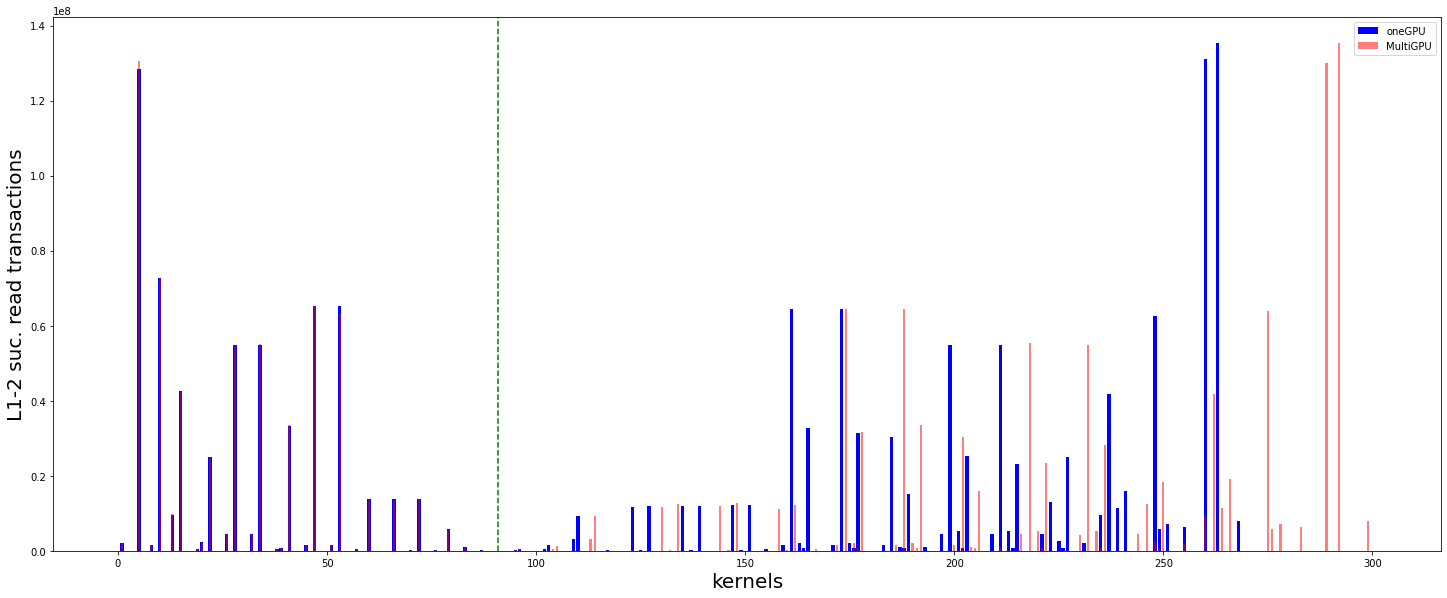

In [45]:
plot_bar_overlap(SuccessRT_one, SuccessRT_multi, delimeter=delimeter, ylabel='L1-2 suc. read transactions', xlabel='kernels', label1='oneGPU', label2='MultiGPU')

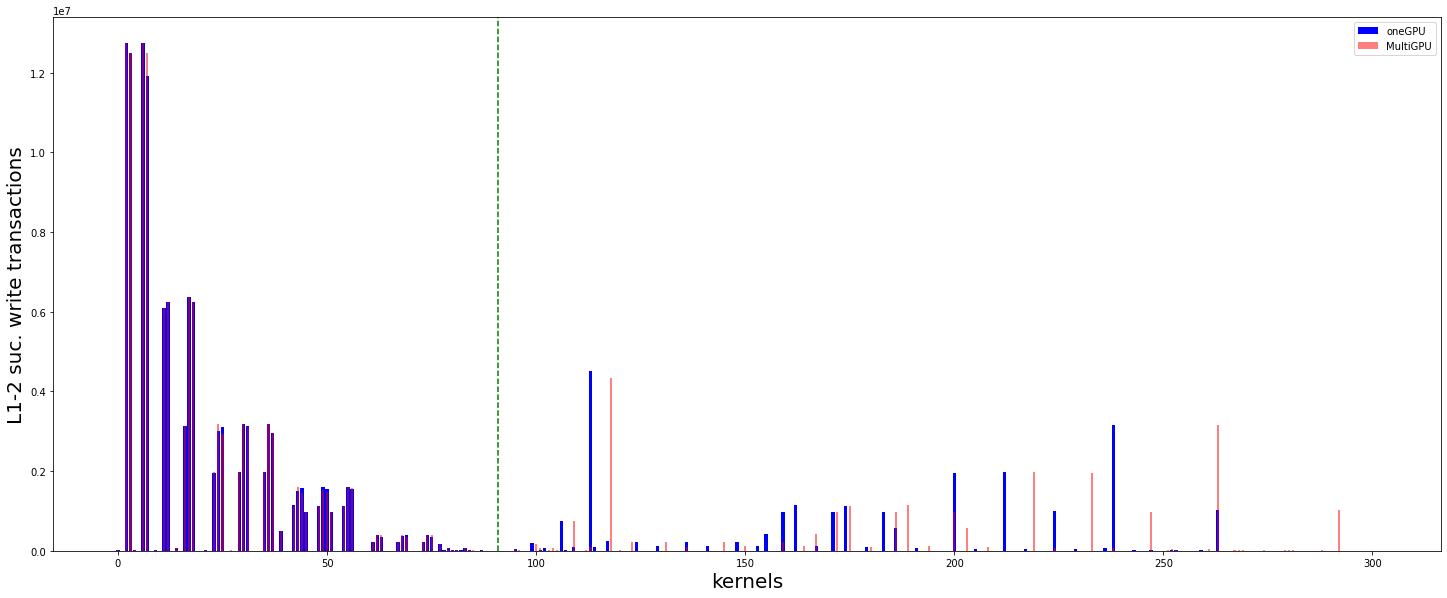

In [46]:
plot_bar_overlap(SuccessWT_one, SuccessWT_multi, delimeter=delimeter, ylabel='L1-2 suc. write transactions', xlabel='kernels', label1='oneGPU', label2='MultiGPU')

In [22]:
SuccessRT_one_time, delimeter_one = create_timearray(SuccessRT_one, durations_one, delimeter, timestep=0.0001)
SuccessWT_one_time, delimeter_one = create_timearray(SuccessWT_one, durations_one, delimeter, timestep=0.0001)

SuccessRT_multi_time, delimeter_multi = create_timearray(SuccessRT_multi, durations_multi, delimeter, timestep=0.0001)
SuccessWT_multi_time, delimeter_multi = create_timearray(SuccessWT_multi, durations_multi, delimeter, timestep=0.0001)

In [23]:
if delimeter_one==delimeter_multi:
    delimeter_time = delimeter_one
else:
    delimeter_time=int((delimeter_one+delimeter_multi)/2)

In [ ]:
plot_bar_overlap(SuccessRT_one_time, SuccessRT_multi_time, delimeter_time, ylabel='Successful L1-2 read transactions', xlabel='Time', label1='OneGPU', label2='MultiGPU')

In [ ]:
plot_bar_overlap(SuccessWT_one_time, SuccessWT_multi_time, delimeter_time, ylabel='Successful L1-2 write transactions', xlabel='Time', label1='OneGPU', label2='MultiGPU')

## averages

### backward

In [49]:
bwd_SRT_one = SuccessRT_one[delimeter:]
bwd_SRT_multi = SuccessRT_multi[delimeter:]

bwd_SWT_one = SuccessWT_one[delimeter:]
bwd_SWT_multi = SuccessWT_multi[delimeter:]

In [50]:
print("Average backward (across kernels) L1-2 sucessful read transactions for oneGPU: {:2f}".format(bwd_SRT_one.mean()))
print("Average backward (across kernels) L1-2 sucessful read transactions for MultiGPU: {:2f}".format(bwd_SRT_multi.mean()))
print("Average backward (across kernels) L1-2 sucessful write transactions for oneGPU: {:2f}".format(bwd_SWT_one.mean()))
print("Average backward (across kernels) L1-2 sucessful write transactions for MultiGPU: {:2f}".format(bwd_SWT_multi.mean()))

Average backward (across kernels) L1-2 sucessful read transactions for oneGPU: 5606468.528066
Average backward (across kernels) L1-2 sucessful read transactions for MultiGPU: 4767433.937993
Average backward (across kernels) L1-2 sucessful write transactions for oneGPU: 128529.106450
Average backward (across kernels) L1-2 sucessful write transactions for MultiGPU: 108490.312695


In [51]:
bwd_SRT_one_time = SuccessRT_one_time[delimeter_time:]
bwd_SRT_multi_time = SuccessRT_multi_time[delimeter_time:]

bwd_SWT_one_time = SuccessWT_one_time[delimeter_time:]
bwd_SWT_multi_time = SuccessWT_multi_time[delimeter_time:]

In [52]:
print("Average backward (across time) L1-2 sucessful read transactions for oneGPU: {:2f}".format(bwd_SRT_one_time.mean()))
print("Average backward (across time) L1-2 sucessful read transactions for MultiGPU: {:2f}".format(bwd_SRT_multi_time.mean()))
print("Average backward (across time) L1-2 sucessful write transactions for oneGPU: {:2f}".format(bwd_SWT_one_time.mean()))
print("Average backward (across time) L1-2 sucessful write transactions for MultiGPU: {:2f}".format(bwd_SWT_multi_time.mean()))

Average backward (across time) L1-2 sucessful read transactions for oneGPU: 39457567.512467
Average backward (across time) L1-2 sucessful read transactions for MultiGPU: 39025095.148644
Average backward (across time) L1-2 sucessful write transactions for oneGPU: 265468.324416
Average backward (across time) L1-2 sucessful write transactions for MultiGPU: 258795.402093


### common kernels

In [61]:
bwd_SRT_one_inter = SuccessRT_one_inter[d:]
bwd_SRT_multi_inter = SuccessRT_multi_inter[d:]

bwd_SWT_one_inter = SuccessWT_one_inter[d:]
bwd_SWT_multi_inter = SuccessWT_multi_inter[d:]

In [62]:
print("Average backward (across common kernels) L1-2 sucessful read transactions for oneGPU: {:2f}".format(bwd_SRT_one_inter.mean()))
print("Average backward (across common kernels) L1-2 sucessful read transactions for MultiGPU: {:2f}".format(bwd_SRT_multi_inter.mean()))
print("Average backward (across common kernels) L1-2 sucessful write transactions for oneGPU: {:2f}".format(bwd_SWT_one_inter.mean()))
print("Average backward (across common kernels) L1-2 sucessful write transactions for MultiGPU: {:2f}".format(bwd_SWT_multi_inter.mean()))

Average backward (across common kernels) L1-2 sucessful read transactions for oneGPU: 10583276.476579
Average backward (across common kernels) L1-2 sucessful read transactions for MultiGPU: 10585276.578238
Average backward (across common kernels) L1-2 sucessful write transactions for oneGPU: 63966.666734
Average backward (across common kernels) L1-2 sucessful write transactions for MultiGPU: 64681.523920


### forward

In [63]:
fwd_SRT_one = SuccessRT_one[:delimeter]
fwd_SRT_multi = SuccessRT_multi[:delimeter]

fwd_SWT_one = SuccessWT_one[:delimeter]
fwd_SWT_multi = SuccessWT_multi[:delimeter]

In [64]:
print("Average forward (across kernels) L1-2 sucessful read transactions for oneGPU: {:2f}".format(fwd_SRT_one.mean()))
print("Average forward (across kernels) L1-2 sucessful read transactions for MultiGPU: {:2f}".format(fwd_SRT_multi.mean()))
print("Average forward (across kernels) L1-2 sucessful write transactions for oneGPU: {:2f}".format(fwd_SWT_one.mean()))
print("Average forward (across kernels) L1-2 sucessful write transactions for MultiGPU: {:2f}".format(fwd_SWT_multi.mean()))

Average forward (across kernels) L1-2 sucessful read transactions for oneGPU: 6817457.833317
Average forward (across kernels) L1-2 sucessful read transactions for MultiGPU: 6826674.923232
Average forward (across kernels) L1-2 sucessful write transactions for oneGPU: 1332208.361575
Average forward (across kernels) L1-2 sucessful write transactions for MultiGPU: 1337801.657710


In [55]:
fwd_SRT_one_time = SuccessRT_one_time[:delimeter_time]
fwd_SRT_multi_time = SuccessRT_multi_time[:delimeter_time]

fwd_SWT_one_time = SuccessWT_one_time[:delimeter_time]
fwd_SWT_multi_time = SuccessWT_multi_time[:delimeter_time]

In [56]:
print("Average backward (across time) L1-2 sucessful read transactions for oneGPU: {:2f}".format(fwd_SRT_one_time.mean()))
print("Average backward (across time) L1-2 sucessful read transactions for MultiGPU: {:2f}".format(fwd_SRT_multi_time.mean()))
print("Average backward (across time) L1-2 sucessful write transactions for oneGPU: {:2f}".format(fwd_SWT_one_time.mean()))
print("Average backward (across time) L1-2 sucessful write transactions for MultiGPU: {:2f}".format(fwd_SWT_multi_time.mean()))

Average backward (across time) L1-2 sucessful read transactions for oneGPU: 39095513.611755
Average backward (across time) L1-2 sucessful read transactions for MultiGPU: 39269876.210496
Average backward (across time) L1-2 sucessful write transactions for oneGPU: 1672635.145564
Average backward (across time) L1-2 sucessful write transactions for MultiGPU: 1685222.458460


## intersection

In [57]:
a = onegpu['Name'].to_numpy()
b = multigpu['Name'].to_numpy()
_, idx_1, idx_4 = np.intersect1d(a,b,return_indices=True)
idx_1 = np.sort(idx_1)
idx_4 = np.sort(idx_4)

In [58]:
def returnIntersection(val1, val2, delimeter, idx1, idx2):
    a = val1[idx1]
    b = val2[idx2]

    d = np.argwhere(idx1>delimeter)[0][0]

    return a,b,d

In [59]:
SuccessRT_one_inter, SuccessRT_multi_inter, d = returnIntersection(SuccessRT_one, SuccessRT_multi, delimeter, idx_1, idx_4)
SuccessWT_one_inter, SuccessWT_multi_inter, d = returnIntersection(SuccessWT_one, SuccessWT_multi, delimeter, idx_1, idx_4)

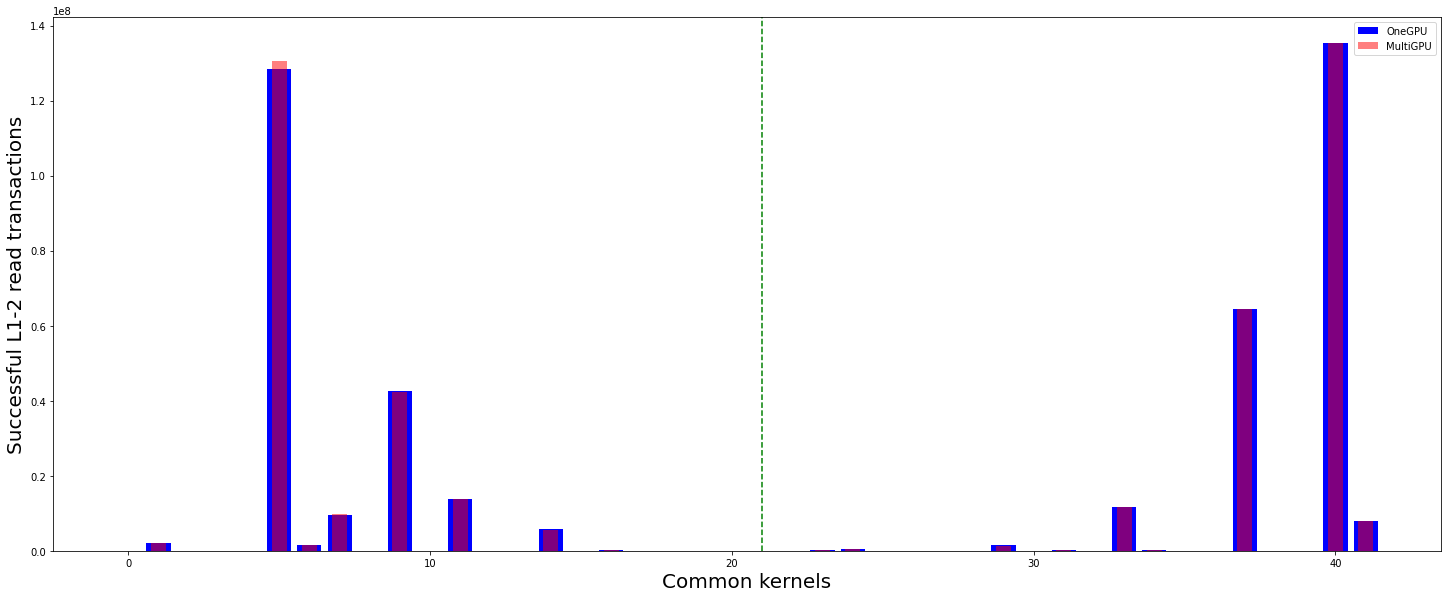

In [20]:
plot_bar_overlap(SuccessRT_one_inter, SuccessRT_multi_inter, delimeter=d, ylabel='Successful L1-2 read transactions', xlabel='Common kernels', label1='OneGPU', label2='MultiGPU')

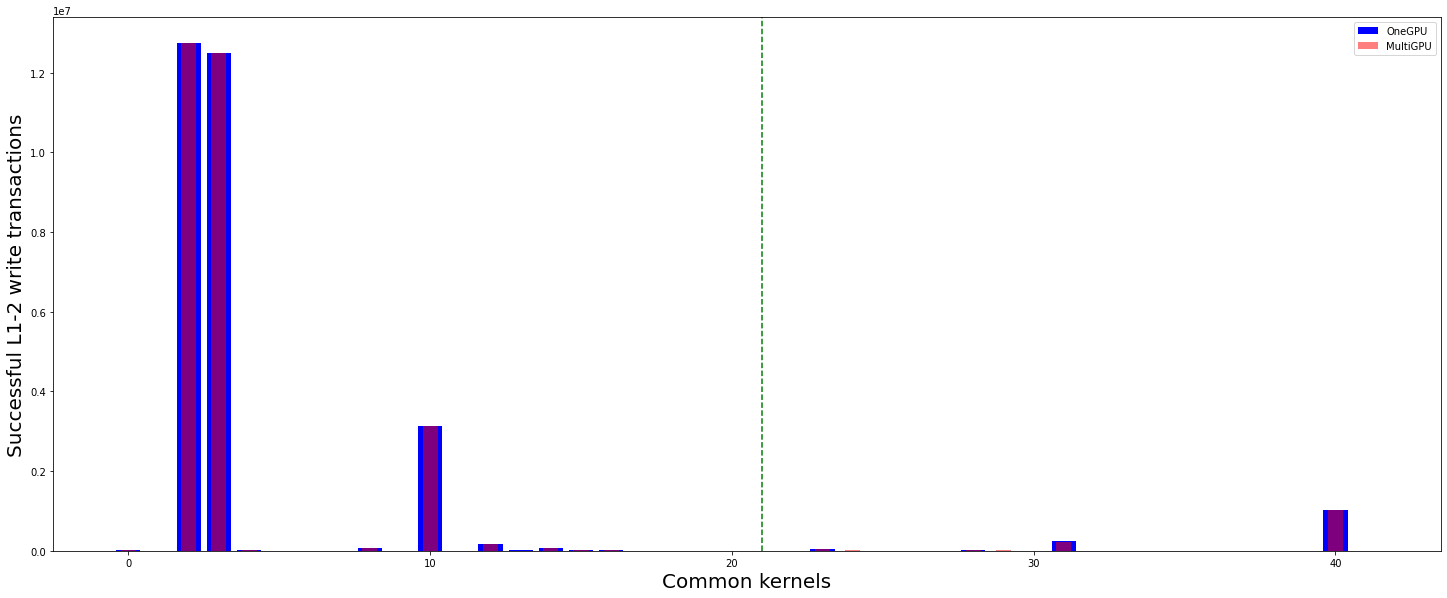

In [21]:
plot_bar_overlap(SuccessWT_one_inter, SuccessWT_multi_inter, delimeter=d, ylabel='Successful L1-2 write transactions', xlabel='Common kernels', label1='OneGPU', label2='MultiGPU')